# Phase 1: Ingest & Inspect the Data 🧐

**First step is to load the data and perform a quick check to see what we're working with. We'll look for things like column names, data types, and the presence of any missing values.**

In [1]:
# Import the pandas library to work with DataFrames
import pandas as pd

In [2]:
# Load the dataset. Replace 'your_dataset.csv' with the actual filename.
df = pd.read_csv('cleaned_5250.csv')

**Here's our first look at the data. We'll check the first few rows,
a summary of the columns, and the data types etc**

In [3]:
# Display the first 5 rows of the DataFrame
print(df.head())

                   name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0            2007         19.40000  Jupiter               1.08    Jupiter   
1            2009         14.74000  Jupiter               1.09    Jupiter   
2            2008          4.80000  Jupiter               1.15    Jupiter   
3            2002          8.13881  Jupiter               1.12    Jupiter   
4            1996          1.78000  Jupiter               1.20    Jupiter   

   orbital_radius  orbital_period  eccentricity detection_method  
0        1.290000        0.892539          0.23  Radial Veloc

In [4]:
# Get a concise summary of the DataFrame, including data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB
None


In [5]:
# Show basic statistics for numerical columns
print(df.describe())

           distance  stellar_magnitude  discovery_year  mass_multiplier  \
count   5233.000000        5089.000000     5250.000000      5227.000000   
mean    2167.168737          12.683738     2015.732190         6.434812   
std     3245.522087           3.107571        4.307336        12.972727   
min        4.000000           0.872000     1992.000000         0.020000   
25%      389.000000          10.939000     2014.000000         1.804000   
50%     1371.000000          13.543000     2016.000000         4.170140   
75%     2779.000000          15.021000     2018.000000         8.000000   
max    27727.000000          44.610000     2023.000000       752.000000   

       radius_multiplier  orbital_radius  orbital_period  eccentricity  
count        5233.000000     4961.000000    5.250000e+03   5250.000000  
mean            1.015121        6.962942    4.791509e+02      0.063568  
std             0.603479      138.673600    1.680445e+04      0.141424  
min             0.200000        

#Phase 2: Data Cleaning & Preparation 🧹


**Our first priority is to clean up the data so that we can accurately calculate the mass and radius of each planet, which are core to the analysis.**

In [6]:

# Step 1: Check for and remove duplicate rows
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dedup = len(df)
print(f"Number of duplicate rows removed: {initial_rows - rows_after_dedup}")


Number of duplicate rows removed: 0


In [8]:
# Step 2: Handle missing values in our core calculation columns
# Dropping rows with missing 'mass_wrt' or 'radius_wrt' is best,
# as these are critical for the mass and radius calculations.
df.dropna(subset=['mass_wrt', 'radius_wrt'], inplace=True)

In [9]:
# Let's check the number of rows left and the null counts again to confirm
print(f"Number of rows after handling core missing values: {len(df)}")
print("\nNull counts after cleanup:")
print(df.isnull().sum())


Number of rows after handling core missing values: 5215

Null counts after cleanup:
name                   0
distance              17
stellar_magnitude    160
planet_type            0
discovery_year         0
mass_multiplier        0
mass_wrt               0
radius_multiplier      0
radius_wrt             0
orbital_radius       282
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64


**We will create two dictionaries to map the planet names from the 'mass_wrt' and 'radius_wrt' columns to their actual values in kilograms and meters.**

In [10]:
# Define the mass of Earth and Jupiter in kilograms (kg)
mass_in_kg = {
    'Earth': 5.972e+24,
    'Jupiter': 1.898e+27
}

# Define the radius of Earth and Jupiter in meters (m)
radius_in_m = {
    'Earth': 6.371e+6,
    'Jupiter': 7.149e+7
}

# Now, we'll create the new columns by applying a function
# that performs the calculation.

# Calculate the mass of the planet in kg
df['mass'] = df['mass_multiplier'] * df['mass_wrt'].map(mass_in_kg)

# Calculate the radius of the planet in meters
df['radius'] = df['radius_multiplier'] * df['radius_wrt'].map(radius_in_m)

# Let's check the new columns and confirm their data types
print(df[['name', 'mass', 'radius']].head())
print(df.info())

                   name          mass      radius
0  11 Comae Berenices b  3.682120e+28  77209200.0
1    11 Ursae Minoris b  2.797652e+28  77924100.0
2       14 Andromedae b  9.110400e+27  82213500.0
3         14 Herculis b  1.544746e+28  80068800.0
4          16 Cygni B b  3.378440e+27  85788000.0
<class 'pandas.core.frame.DataFrame'>
Index: 5215 entries, 0 to 5249
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5215 non-null   object 
 1   distance           5198 non-null   float64
 2   stellar_magnitude  5055 non-null   float64
 3   planet_type        5215 non-null   object 
 4   discovery_year     5215 non-null   int64  
 5   mass_multiplier    5215 non-null   float64
 6   mass_wrt           5215 non-null   object 
 7   radius_multiplier  5215 non-null   float64
 8   radius_wrt         5215 non-null   object 
 9   orbital_radius     4933 non-null   float64
 10  orbital_period   

# Phase 3: Analysis & Visualization 📊

**Insight 1: What is the distribution of different planet types?**

/tmp/ipython-input-3986148184.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=planet_type_counts.index, y=planet_type_counts.values, palette='viridis')


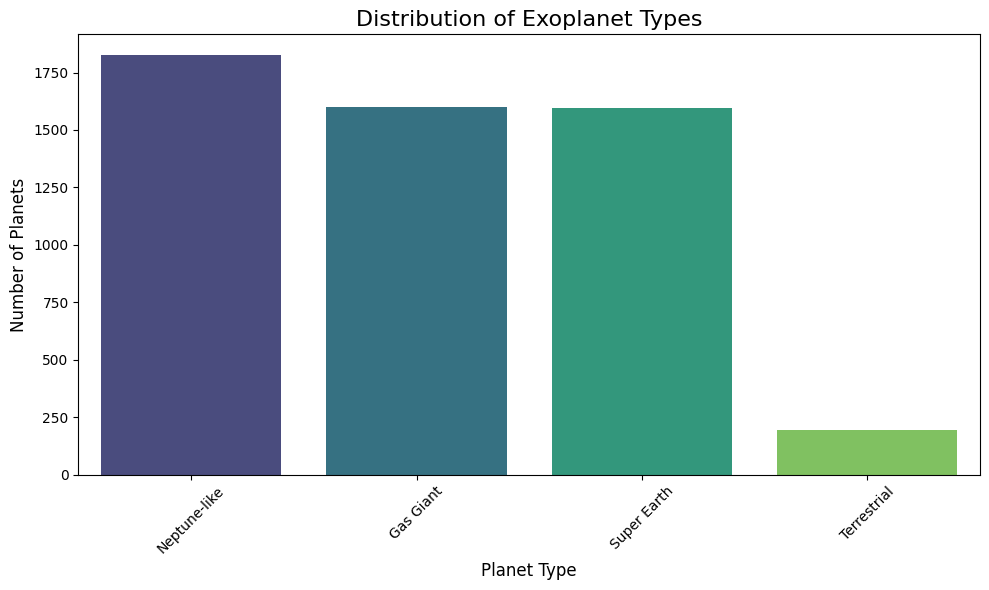

In [11]:
# exploring the distribution of planet types.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Count the occurrences of each planet type and sort them
planet_type_counts = df['planet_type'].value_counts()
sns.barplot(x=planet_type_counts.index, y=planet_type_counts.values, palette='viridis')

plt.title('Distribution of Exoplanet Types', fontsize=16)
plt.xlabel('Planet Type', fontsize=12)
plt.ylabel('Number of Planets', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight 2: What is the relationship between a planet's mass and its radius?**

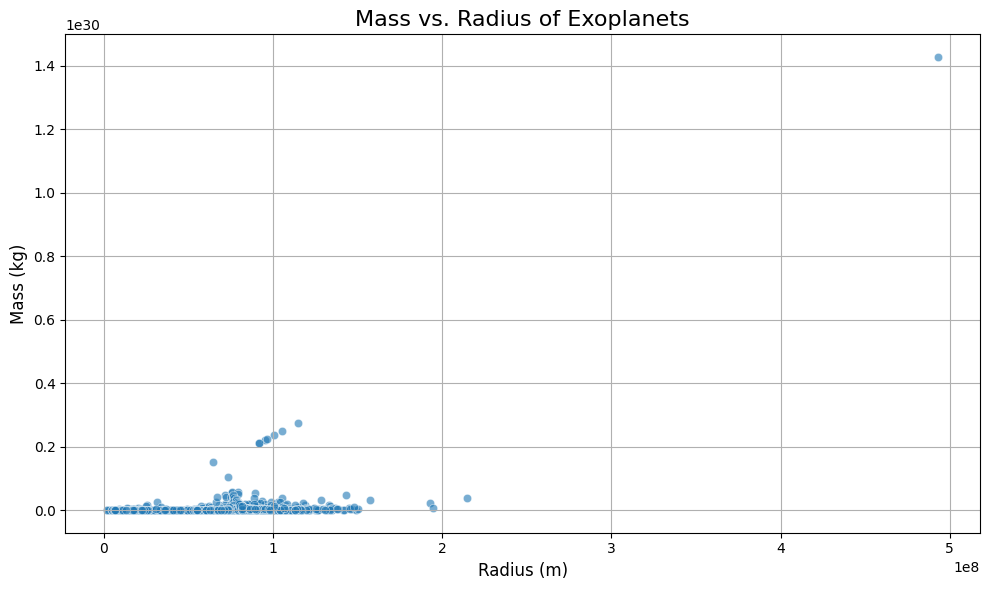

In [14]:
# visualizing the relationship between planet mass and radius.

plt.figure(figsize=(10, 6))
# Using a scatter plot to show the relationship
sns.scatterplot(x=df['radius'], y=df['mass'], alpha=0.6)

plt.title('Mass vs. Radius of Exoplanets', fontsize=16)
plt.xlabel('Radius (m)', fontsize=12)
plt.ylabel('Mass (kg)', fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight 3: How has the discovery of exoplanets changed over the years?**

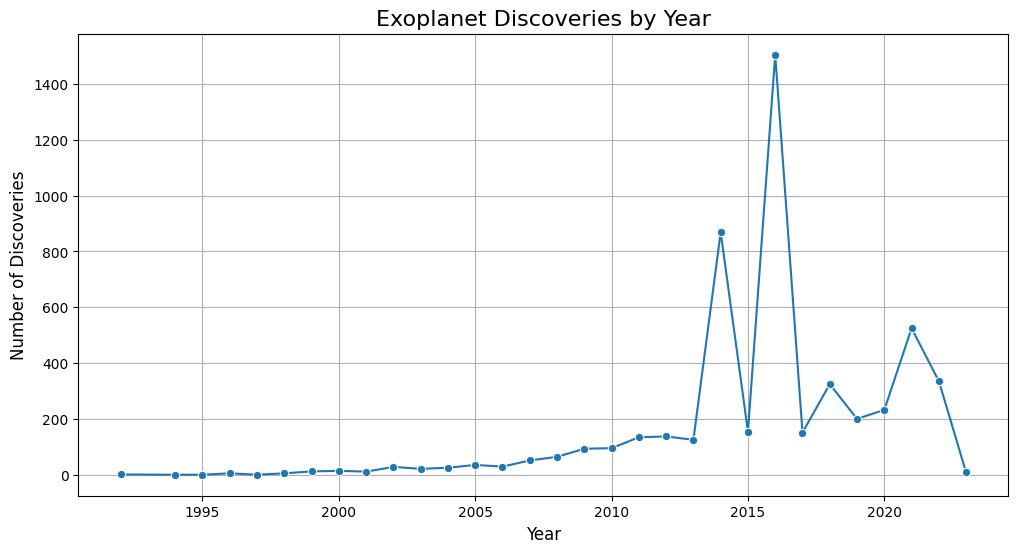

In [15]:
# analyzing the trend of planet discovery over time.

# Group by 'discovery_year' and count the number of planets
discoveries_per_year = df['discovery_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
# Use a line chart to show the trend
sns.lineplot(x=discoveries_per_year.index, y=discoveries_per_year.values, marker='o')

plt.title('Exoplanet Discoveries by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Discoveries', fontsize=12)
plt.grid(True)
plt.show()

# Conclusion: A Decade of Discovery in Exoplanets


Our findings reveal three key insights:

* **A "Neptune-like" Universe:** The first and most significant finding is that our universe of discovered exoplanets is predominantly filled with **Neptune-like planets**, which make up the largest proportion of our sample with over 1750 discoveries. This is followed by a similar count of **gas giants** and **super-Earths**, with terrestrial (Earth-like) planets being far less common. This insight provides a foundational understanding of the physical composition of planets that have been discovered to date.

* **The Mass-Radius Anomaly:** Our second analysis on the mass and radius of these planets revealed a clear concentration of discoveries at the lower end of the scale. A large cluster of planets with a very low mass (around 0.1 of a Jupiter mass) and a small radius (0-1.5 Jupiter radii) suggests that smaller planets, like our own, are being discovered with increasing frequency.

* **The Discovery Boom:** Finally, the most striking trend in our data is the massive spike in exoplanet discoveries starting in **2014**. Before this period, discoveries were consistently below 200 per year. However, following the launch of new planet-hunting telescopes, this number skyrocketed to over 1400 in 2015, before stabilizing to around 400 after 2021. This clearly shows how technological advancements can accelerate our understanding of the cosmos.

In summary, our analysis demonstrates that while the discovery of exoplanets has been revolutionized by new technology, the majority of planets we have found so far are significantly different in size and composition than our own.